<a href="https://colab.research.google.com/github/gbAguiiar/machine-learning-unsupervised/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
  import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster




url = 'https://raw.githubusercontent.com/gbAguiiar/machine-learning-unsupervised/refs/heads/main/mall_customers.csv'
df = pd.read_csv(url)

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,64,116,33
1,2,Female,29,101,30
2,3,Male,33,36,81
3,4,Male,41,62,32
4,5,Male,36,135,42


In [3]:
df.head()
#visualizando informações que o dataset possui

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,64,116,33
1,2,Female,29,101,30
2,3,Male,33,36,81
3,4,Male,41,62,32
4,5,Male,36,135,42


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,43.715500,77.44650,50.658500
std,577.494589,15.067816,35.89729,28.383687
min,1.000000,18.000000,15.00000,1.000000
25%,500.750000,31.000000,47.00000,26.000000
50%,1000.500000,43.000000,76.50000,51.000000
75%,1500.250000,56.250000,108.00000,76.000000
max,2000.000000,70.000000,140.00000,100.000000


In [5]:
df.info()
#verificado que todas as colunas são númericas, exceto a de gênero, será necessário aplicar o One-Hot enconding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income (k$)      2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 78.3+ KB


In [6]:
#dropa tabela de ID que não será relevante para o dataset
df = df.drop("CustomerID", axis=1)

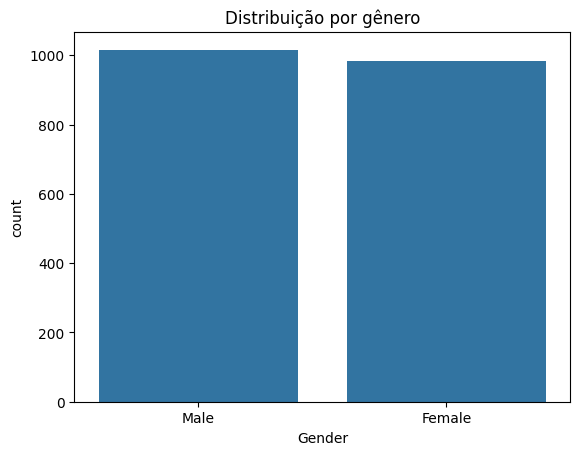

In [7]:
sns.countplot(data=df, x='Gender')
plt.title("Distribuição por gênero")
plt.show()

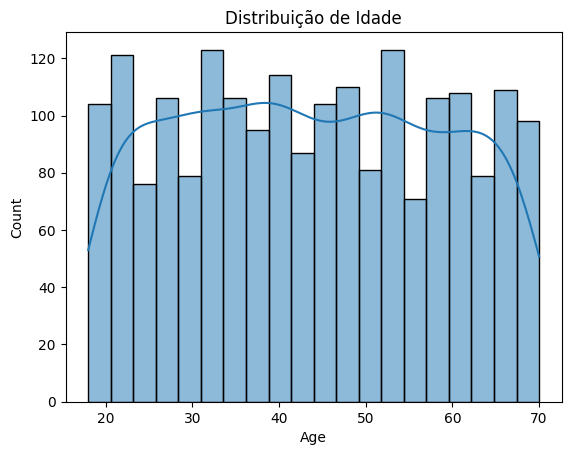

In [8]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distribuição de Idade")
plt.show()


Essas diferenças de distribuição de idade já indicam que pode haver clusters naturais entre:

Jovens adultos (18–30),

Adultos médios (30–45),

Adultos mais velhos (45+).

In [9]:
#aplica one-hot encoding na coluna Gender
df = pd.get_dummies(df, columns=["Gender"], drop_first=True)

In [10]:
#Escala as colunas diretamente do dataset

scaler = StandardScaler()
numeric_features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
df[numeric_features] = scaler.fit_transform(df[numeric_features])

df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1.346550,1.074263,-0.622291,True
1,-0.976862,0.656300,-0.728012,False
2,-0.711329,-1.154875,1.069244,True
3,-0.180264,-0.430405,-0.657531,True
4,-0.512180,1.603684,-0.305128,True


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


Text(0, 0.5, 'Inércia (WCSS)')

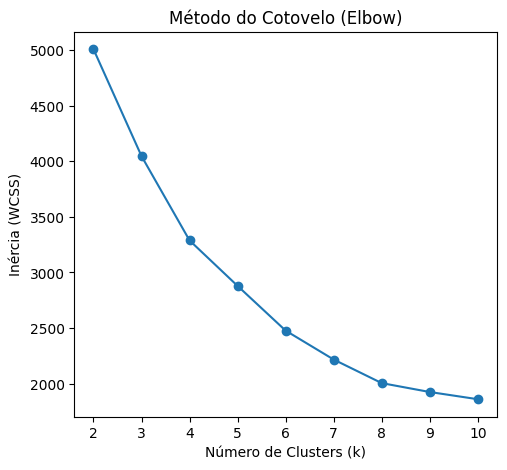

In [12]:
#aplica o gráfico do cotovelo para identificar o melhor número de K=4

X = df.copy()

inertias = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)

    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))

# Gráfico do Método do Cotovelo
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_range, inertias, marker='o')
plt.title("Método do Cotovelo (Elbow)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia (WCSS)")


Através do gráfico acima usando o método do cotovelo
é perceptível que o melhor número de cluster para este dataset é K=4

In [13]:
from sklearn.cluster import KMeans

X = df[numeric_features]  # usa as colunas já escaladas
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters



In [14]:
#Faz um for em todas as combinações para verificar o melhor silhouette score
combinacoes = [
    ["Age", "Spending Score (1-100)"],
    ["Annual Income (k$)", "Spending Score (1-100)"],
    ["Age", "Annual Income (k$)"],
    ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
]

for combo in combinacoes:
    X = df[combo]
    kmeans = KMeans(n_clusters=4, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"{combo} → Silhouette: {score:.3f}")


['Age', 'Spending Score (1-100)'] → Silhouette: 0.405
['Annual Income (k$)', 'Spending Score (1-100)'] → Silhouette: 0.405
['Age', 'Annual Income (k$)'] → Silhouette: 0.404
['Age', 'Annual Income (k$)', 'Spending Score (1-100)'] → Silhouette: 0.279


In [15]:
df['Cluster'].value_counts()


,count
Cluster,
3,518
2,507
1,488
0,487


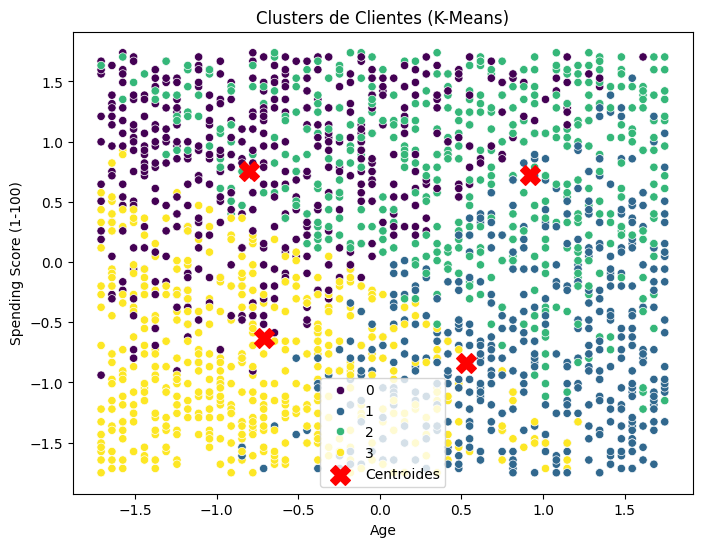

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Cluster", palette="viridis")
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 1],  # eixo X = Idade
    centroids[:, 2],  # eixo Y = Pontuação de gasto
    s=200, c='red', marker='X', label='Centroides'
)
plt.title("Clusters de Clientes (K-Means)")
plt.legend()
plt.show()


Pelo gráfico:

Cluster roxo (0):
Clientes mais jovens (idades baixas) com alto gasto.
Esse grupo tende a ser mais impulsivo e receptivo a novidades, representando consumidores ativos e de maior engajamento.

Cluster amarelo (1):
Clientes mais jovens, porém com baixo gasto.
Podem estar em fase inicial da vida financeira ou demonstrar menor interesse em consumo — público com potencial de crescimento.

Cluster verde (2):
Clientes mais velhos, com alto gasto.
Provavelmente são consumidores mais estáveis financeiramente, que valorizam qualidade e estão dispostos a investir mais.

Cluster azul (3):
Clientes mais velhos, com baixo gasto.
Podem ser mais conservadores ou seletivos nas compras, indicando um perfil de retenção mais difícil ou de foco em produtos essenciais.

In [17]:
from sklearn.model_selection import KFold


# Usar as colunas que foram escalonadas para a validação cruzada
X = df[["Age", "Spending Score (1-100)"]].values

kf = KFold(n_splits=5, shuffle=True, random_state=42)
silhouette_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    kmeans = KMeans(n_clusters=4, random_state=42)
    labels = kmeans.fit_predict(X_train)
    silhouette_scores.append(silhouette_score(X_train, labels))

print("Silhouette médio (validação cruzada):", np.mean(silhouette_scores))



Silhouette médio (validação cruzada): 0.4048963072877541


apresenta clusters razoavelmente definidos, mas com alguma instabilidade entre subconjuntos de dados, conforme observado na validação cruzada (Silhouette médio ≈ 0.404)

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Selecionando apenas as variáveis de interesse
X_age_spending = df[["Age", "Spending Score (1-100)"]]

# aplica o modelo K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_age_spending)

# Calcula métricas de avaliação
sil = silhouette_score(X_age_spending, clusters)
db = davies_bouldin_score(X_age_spending, clusters)
ch = calinski_harabasz_score(X_age_spending, clusters)

print(f"Silhouette Score: {sil:.4f}")
print(f"Davies-Bouldin Index: {db:.4f}")
print(f"Calinski-Harabasz Index: {ch:.4f}")


Silhouette Score: 0.4049
Davies-Bouldin Index: 0.7758
Calinski-Harabasz Index: 1978.9935


Davies-Bouldin: Uma separação moderada, com certa sobreposição entre grupos.

Ainda assim, adequado para um cenário realista de segmentação de clientes.

Calinski-Harabasz: Boa compactação e separação relativa.

Comparado com outros Ks (ex: 2, 3, 5), esse valor pode confirmar que K=4 realmente é um ponto equilibrado entre separação e coesão.

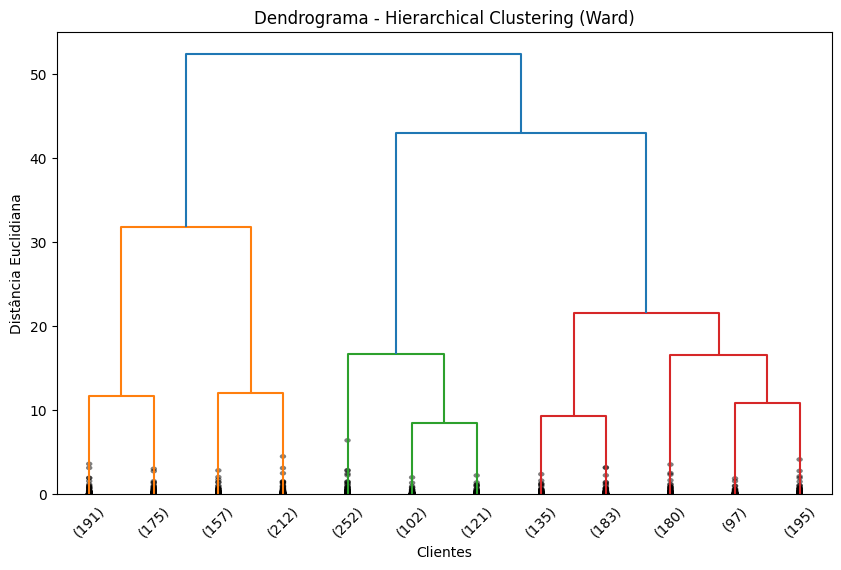

In [19]:

#APLICANDO O HIERARCHICAL CLUSTERING

# Seleciona as variáveis
X = df[["Age", "Spending Score (1-100)"]]

# Escalonamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Criação do linkage matrix (usando método 'ward' que minimiza a variância dentro dos grupos)
Z = linkage(X_scaled, method='ward')

# Plot do dendrograma
plt.figure(figsize=(10, 6))
plt.title("Dendrograma - Hierarchical Clustering (Ward)")
plt.xlabel("Clientes")
plt.ylabel("Distância Euclidiana")
dendrogram(Z, truncate_mode="lastp", p=12, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.show()


O dendrograma mostra quatro agrupamentos bem separados, reforçando que o corte foi adequado.

As distâncias maiores entre os grupos (altura das linhas) indicam diferenças significativas no comportamento de consumo, especialmente entre grupos de idades e padrões de gasto diferentes.

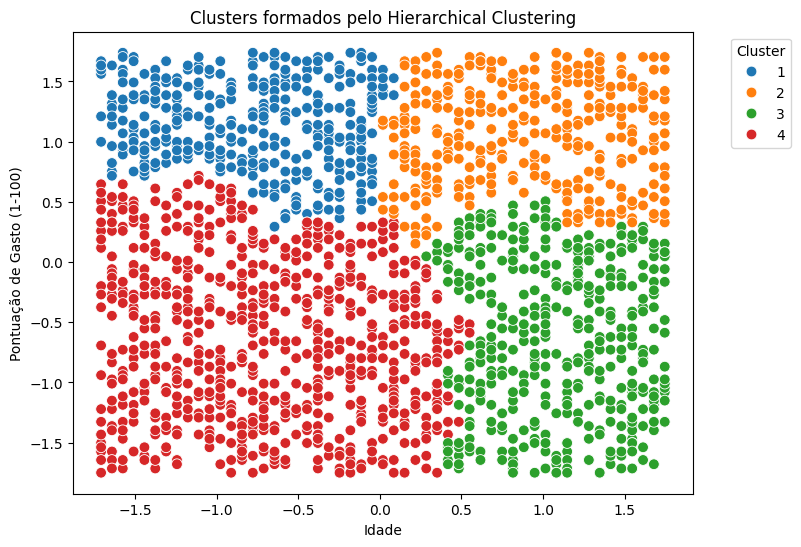

Silhouette Score: 0.3464
Davies-Bouldin Index: 0.8310
Calinski-Harabasz Index: 1555.6829


In [20]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Define o número de clusters
n_clusters = 4
clusters_h = fcluster(Z, n_clusters, criterion='maxclust')

# Adiciona ao DataFrame
df['Cluster_H'] = clusters_h

# Visualiza os clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["Age"],
    y=df["Spending Score (1-100)"],
    hue=df["Cluster_H"],
    palette="tab10",
    s=60
)
plt.title("Clusters formados pelo Hierarchical Clustering")
plt.xlabel("Idade")
plt.ylabel("Pontuação de Gasto (1-100)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Avaliação de métricas
sil = silhouette_score(X_scaled, clusters_h)
db = davies_bouldin_score(X_scaled, clusters_h)
ch = calinski_harabasz_score(X_scaled, clusters_h)

print(f"Silhouette Score: {sil:.4f}")
print(f"Davies-Bouldin Index: {db:.4f}")
print(f"Calinski-Harabasz Index: {ch:.4f}")


In [21]:

from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import KFold
import numpy as np

# Cria o KFold com 5 divisões
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Listas para armazenar métricas
sil_scores, db_scores, ch_scores = [], [], []


max_sample = 600
rng = np.random.RandomState(42)

for i, (train_idx, _) in enumerate(kf.split(X_scaled)):
    X_train = X_scaled[train_idx]

    # Limita número de amostras
    if X_train.shape[0] > max_sample:
        sel = rng.choice(X_train.shape[0], size=max_sample, replace=False)
        X_train = X_train[sel]

    # Cria e treina o modelo hierárquico
    hc = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')
    labels = hc.fit_predict(X_train)

    # Calcula métricas
    sil = silhouette_score(X_train, labels)
    db = davies_bouldin_score(X_train, labels)
    ch = calinski_harabasz_score(X_train, labels)

    sil_scores.append(sil)
    db_scores.append(db)
    ch_scores.append(ch)

    print(f"Fold {i+1}: Silhouette={sil:.4f}, DB={db:.4f}, CH={ch:.2f}")

# Exibe médias e desvios
print("\n=== Resultados Médios (5 Folds) ===")
print(f"Silhouette Score médio: {np.mean(sil_scores):.4f} ± {np.std(sil_scores):.4f}")
print(f"Davies-Bouldin médio: {np.mean(db_scores):.4f} ± {np.std(db_scores):.4f}")
print(f"Calinski-Harabasz médio: {np.mean(ch_scores):.2f} ± {np.std(ch_scores):.2f}")


Fold 1: Silhouette=0.3658, DB=0.7842, CH=492.24
Fold 2: Silhouette=0.3386, DB=0.8733, CH=435.27
Fold 3: Silhouette=0.3709, DB=0.7793, CH=501.44
Fold 4: Silhouette=0.3298, DB=0.8528, CH=436.88
Fold 5: Silhouette=0.3254, DB=0.8628, CH=421.03

=== Resultados Médios (5 Folds) ===
Silhouette Score médio: 0.3461 ± 0.0187
Davies-Bouldin médio: 0.8305 ± 0.0404
Calinski-Harabasz médio: 457.37 ± 32.82


O modelo hierárquico apresentou resultados ligeiramente inferiores, com menor separação entre grupos e maior sobreposição visual nas fronteiras dos clusters, porém, os resultados de validação cruzada mostram consistência nos agrupamentos, com pequenas variações entre folds. Isso indica estabilidade no comportamento dos clusters, mesmo com pequenas divisões nos dados.



**Conclusão:**

Com base nos resultados obtidos:

O K-Means foi o modelo que melhor segmentou os dados, com maior coesão interna e melhor separação entre clusters.

O Hierarchical Clustering, apesar de apresentar resultados ligeiramente inferiores, é útil para compreender a estrutura hierárquica e as relações entre grupos.

As métricas de validação cruzada confirmam que o modelo é estável e generalizável.

A análise de idade x pontuação de gasto mostrou-se eficaz para compreender perfis de consumo e pode ser utilizada por empresas para estratégias de marketing segmentadas.

Ambos os modelos cumpriram o objetivo proposto de identificar perfis distintos de clientes.
O K-Means mostrou melhor desempenho quantitativo, enquanto o Hierarchical Clustering se destacou pela interpretabilidade e estruturação visual.